# Issue Addressor Agent

This agent is responsible for addressing issues on the codebase. A title and description are extracted from the Gitlab or Github issue and passed to the agent.

It will start by distinguishing if the details are requests to change the code and if so, it will plan and execute the next steps.

In [6]:
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.store.memory import InMemoryStore
from langgraph.types import Command
from rich import print  # noqa: A004

from automation.agents.issue_addressor import IssueAddressorAgent
from automation.conf import settings

source_repo_id = "dipcode/django-webhooks"
source_ref = "master"

config = {
    "run_name": "IssueAddressor",
    "recursion_limit": settings.RECURSION_LIMIT,
    "configurable": {"source_repo_id": source_repo_id, "source_ref": source_ref, "thread_id": "1"},
}
store = InMemoryStore()
checkpointer = InMemorySaver()
issue_addressor = IssueAddressorAgent(store=store, checkpointer=checkpointer)

## Graph 

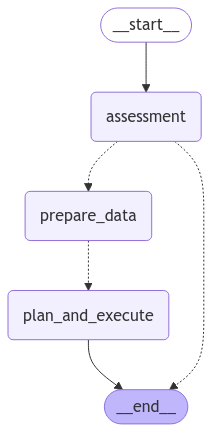

In [7]:
from IPython.display import Image, display  # noqa: A004

display(Image(issue_addressor.draw_mermaid()))

## Examples

Here are examples of the issue addressor agent in action. 

### Issue with no code changes

In [8]:
result = issue_addressor.agent.invoke(
    {"issue_title": "Review README.md", "issue_description": "Find and fix textual typos in the README.md file."},
    config=config,
    subgraphs=True,
)

In [9]:
print(result[1]["plan_goal"])
print(result[1]["plan_tasks"])

Fix textual typos in README.md and update the CHANGELOG.md file

[
    Task(
        title="Fix typo in 'Usefull commands' section heading",
        description="The 'Usefull commands' heading in the README.md file contains a typo. The word 'Usefull' is 
misspelled. It should be corrected to 'Useful'.",
        subtasks=[
            "Locate the 'Usefull commands' heading in the README.md file (appears in the Table of Contents and as a
subheading in the Development section)",
            "Change 'Usefull commands' to 'Useful commands' in both locations"
        ],
        path='README.md',
        context_paths=['README.md']
    ),
    Task(
        title='Fix numbered list formatting in Installation section',
        description="All numbered lists in the README.md file start with '1.' instead of sequential numbering (1, 
2, 3). While this is acceptable in Markdown as it will render correctly, it's better to use sequential numbering 
for better readability in the raw file.",
        subtasks=[
            "In the Installation section, change the second list item from '1.' to '2.'",
            "In the Installation section, change the third list item from '1.' to '3.'",
            "In the Development section, change the second list item from '1.' to '2.'",
            "In the Development section, change the third list item from '1.' to '3.'"
        ],
        path='README.md',
        context_paths=['README.md']
    ),
    Task(
        title='Update the CHANGELOG.md file to document the typo fixes',
        description="According to the project requirements, all changes must be documented in the CHANGELOG.md file
following the 'Keep a Changelog' notation. We need to add an entry for the typo fixes in the README.md file.",
        subtasks=[
            'Add a new entry under the [Unreleased] section',
            "Create a new subsection titled '### Fixed'",
            "Add a bullet point: '- Fixed typos in README.md file.'"
        ],
        path='CHANGELOG.md',
        context_paths=['CHANGELOG.md']
    )
]

In [10]:
result = issue_addressor.agent.invoke(Command(resume=[("human", "I approve the plan")]), config=config, subgraphs=True)
print(result)

(
    (),
    {
        'messages': [
            HumanMessage(
                content=[
                    {
                        'type': 'text',
                        'text': "# Issue to implement\n<issue_title>Review 
README.md</issue_title>\n<issue_description>Find and fix textual typos in the README.md 
file.</issue_description>\n\n# Project Context\n<project_description>Django app to send and manage webhooks. Every 
change must be declared on the CHANGLOG file, following the 'Keep a Changelog' notation.</project_description>\n"
                    }
                ],
                additional_kwargs={},
                response_metadata={},
                id='e08018f3-ca32-450e-8522-32f20c36a818'
            ),
            AIMessage(
                content=[
                    {
                        'signature': 
'ErUBCkYIARgCIkDL7LfjverEHZ0jJCCn1j+I/Qg73Z7d6PjwXfi4rK93bX+FGuq+jwo5dvMhKOTLqB6/Gh7RvdrPkINhOqIokEMMEgzwSrRL0tNapg
TF6W4aDKd+jYWjl9IwKvw5ASIw22XmnYS5ZXgti39piDZVICSO0v93JP72hlfB6VJwYdNQ/clKR8Y71xXZSSfleQ95Kh1mVjAfn0QjYkqX8X7V12Dww
oZ4yga3RmE9oz0rLA==',
                        'thinking': "I need to review the README.md file to find and fix textual typos. Let's break
down this task:\n\n1. First, I need to retrieve the README.md file content to analyze it for typos.\n2. I should 
also look at the CHANGELOG file to understand the format for documenting changes.\n3. After identifying the typos, 
I'll create a detailed checklist for fixing them.\n4. I'll need to ensure that the checklist includes making an 
entry in the CHANGELOG file.\n\nLet's start by retrieving the content of the README.md file:\n",
                        'type': 'thinking'
                    },
                    {
                        'text': "I'll help you review the README.md file to find and fix textual typos. Let me 
first retrieve the content of the file to analyze it.",
                        'type': 'text'
                    },
                    {
                        'id': 'toolu_015dT9BNoUUPJyg2NyWwR1aZ',
                        'input': {
                            'file_path': 'README.md',
                            'intent': 'To examine the README.md file for textual typos'
                        },
                        'name': 'retrieve_file_content',
                        'type': 'tool_use'
                    }
                ],
                additional_kwargs={},
                response_metadata={
                    'id': 'msg_01TaXWhr4XYoFvqjDwnyhWx9',
                    'model': 'claude-3-7-sonnet-20250219',
                    'stop_reason': 'tool_use',
                    'stop_sequence': None,
                    'usage': {
                        'cache_creation_input_tokens': 0,
                        'cache_read_input_tokens': 0,
                        'input_tokens': 3358,
                        'output_tokens': 255
                    }
                },
                name='plan_agent',
                id='run-e37fd8f8-ec2a-4c18-9793-00598b1b46e3-0',
                tool_calls=[
                    {
                        'name': 'retrieve_file_content',
                        'args': {
                            'file_path': 'README.md',
                            'intent': 'To examine the README.md file for textual typos'
                        },
                        'id': 'toolu_015dT9BNoUUPJyg2NyWwR1aZ',
                        'type': 'tool_call'
                    }
                ],
                usage_metadata={
                    'input_tokens': 3358,
                    'output_tokens': 255,
                    'total_tokens': 3613,
                    'input_token_details': {'cache_creation': 0, 'cache_read': 0}
                }
            ),
            ToolMessage(
                content='<repository_file path="README.md">\n# Django Webhooks\n\nDjango Webhooks is a Python 
package that provides a convenient way to handle webhooks in Django a

In [11]:
from automation.utils import file_changes_namespace

for item in store.search(file_changes_namespace(source_repo_id, source_ref)):
    print(f"============================= {item.key} =============================")
    print(item.value["data"].content)

============================= README.md =============================

# Django Webhooks

Django Webhooks is a Python package that provides a convenient way to handle webhooks in Django applications. With 
this package, you can easily receive and process webhook events from various services.

## Table of contents

- [Django Webhooks](#django-webhooks)
  - [Table of contents](#table-of-contents)
  - [Installation](#installation)
  - [Usage](#usage)
  - [Development](#development)
    - [Running tests](#running-tests)
    - [Useful commands](#useful-commands)
  - [Update the package version](#update-the-package-version)

## Installation

1. Download / install the app using pip:

   ```shell
   $ pip install django-webhooks
   ```

2. Add the app `webhooks` to your `INSTALLED_APPS` Django settings:

   ```python
   # settings.py
   INSTALLED_APPS = (
      ...
      'webhooks',
      ...
   )
   ```

3. Add the `webhooks.urls` to your project urls:

   ```python
   # urls.py
   from django.urls import path

   urlpatterns = [
      ...
      path(route="-/", view=include("webhooks.urls")),
      ...
   ]
   ```

## Development

1. To start development just clone this project:

   ```shell
   $ git clone git@git.eurotux.com:dipcode/python/django-webhooks.git
   ```

2. Access to project root dir and install dependencies locally:

   ```shell
   $ cd django-webhooks/
   $ pipenv install --dev
   ```

3. Install the `pre-commit` hooks:

   ```shell
   $ pipenv run pre-commit install
   ```

### Running tests

To run tests:

```shell
# Unit tests
$ pipenv run test

# Linting tests
$ pipenv run lint
$ pipenv run lint-fix
$ pipenv run lint-check
$ pipenv run lint-format

```

### Useful commands

The project includes a `Makefile` to help you in some tasks listed below:

```shell
$ make help
makemigrations       Make Django migrations
makemessages         Catch new messages for translations
compilemessages      Compile translations messages
clean                remove all build, test, coverage and Python artifacts
clean-build          remove build artifacts
clean-pyc            remove Python file artifacts
clean-test           remove test and coverage artifacts
install              install the package to the active Python's site-packages
dist                 builds source and wheel package and upload result
```

## Update the package version

After your development and before merging, please follow the procedure in: 
(https://dipcode.atlassian.net/wiki/x/B4B02Q)

============================= CHANGELOG.md =============================

# Changelog

All notable changes to this project will be documented in this file.

The format is based on [Keep a Changelog](http://keepachangelog.com/en/1.0.0/)
and this project adheres to [Semantic Versioning](http://semver.org/spec/v2.0.0.html).

## [Unreleased]

### Fixed

- Fixed typos in README.md file.

## [0.3.2] - 2024-08-13

### Fixed

- Another tentative to resolve response not being defined at some circumstances.

## [0.3.1] - 2024-08-13

### Removed

- Removed `authentication_classes` and `permission_classes` from `BaseCallbackView` to allow the user to set it on 
the view.

### Fixed

- Removed `MovementCallbackSerializer` and `WEBHOOK_EVENT_PAYMENTS_MOVEMENT` from `BaseCallbackView`;
- Fixed bug on `send_webhook_request` where `response` could not be defined at some circumstances.

## [0.3.0] - 2024-08-12

### Added

- Added `rest_framework` integration with base view and serializer to help handle callbacks.

### Changed

- Changed `__str__` of models to return more readable information.

### Fixed

- Fixed reponse not being stored on `WebhookEvent` model.

## [0.2.4] - 2024-08-10

### Fixed

- Fixed signals being considered as weak and being garbage collected 
(https://docs.djangoproject.com/en/dev/topics/signals/#:~:text=weak%20%E2%80%93%20Django%20stores%20signal%20handle
rs,the%20signal's%20connect()%20method.)

## [0.2.3] - 2024-08-10

### Fixed

- Fixed signals not being connected.

## [0.2.2] - 2024-08-09

### Added

- Added logging to webhook registry.

### Changed

- Changed all logger to use the same name.

## [0.2.1] - 2024-08-09

### Fixed

- Model dump on payload was generating non-serializable data.

## [0.2.0] - 2024-08-08

### Added

- Webhook event name is sent on the payload of the request too.
- Added constants with header names.

### Changed

- Changed method `generate_signature_token` to generate the signature of the webhook event. The payload was removed
and the event uuid was added to the signature. **BREACKING CHANGE**.
- Admin webhooks list now shows as a `filter_horizontal` on `WebhookSubscriptionAdmin`.

### Fixed

- Payload was being saved in the database as a string, now it is saved as a JSON object.

## [0.1.1] - 2024-07-19

### Fixed

- Serialize payload correctly in post request.

## [0.1.0] - 2024-07-12

### Added

- First commit

[Unreleased]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.3.2...master
[0.3.2]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.3.1...v0.3.2
[0.3.1]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.3.0...v0.3.1
[0.3.0]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.2.4...v0.3.0
[0.2.4]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.2.3...v0.2.4
[0.2.3]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.2.2...v0.2.3
[0.2.2]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.2.1...v0.2.2
[0.2.1]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.2.0...v0.2.1
[0.2.0]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.1.1...v0.2.0
[0.1.1]: https://git.eurotux.com/dipcode/python/django-webhooks/-/compare/v0.1.0...v0.1.1
[0.1.0]: https://git.eurotux.com/dipcode/python/django-webhooks/tree/0.1.0

In [30]:
result = issue_addressor.agent.invoke(
    {
        "issue_title": "Improve documentation",
        "issue_description": """Replace the `make help` output on `Usefull commands` with the following:
```
compilemessages      Compile translations messages
makemigrations       Make Django migrations
makemessages         Catch new messages for translations
clean                Remove all build, test, coverage and Python artifacts
clean-build          Remove build artifacts
clean-pyc            Remove Python file artifacts
clean-test           Remove test and coverage artifacts
install              Install the package to the active Python's site-packages
dist                 Build source and wheel package and upload result
```""",
    },
    config=config,
    subgraphs=True,
)

In [33]:
result = issue_addressor.agent.invoke(
    {
        "issue_title": "Truncate data of webhook payload",
        "issue_description": """We're getting saved request and response data to big being persisted on the WebhookEvent database model.
We need to truncate data if size of values is higher than a threshold before being saved onto the database.
We need to be able too to manage a blacklist of keys to truncate, without need to check the threshold.
Make this configurable by field, or globally using webhooks/conf.py.""",  # NOQA
    },
    config=config,
    subgraphs=True,
)

In [ ]:
result = issue_addressor.agent.invoke(
    {
        "issue_title": "Coverage improvement",
        "issue_description": "Add unittests to cover the file `webhooks/contrib/rest_framework/serializers.py`",
    },
    config=config,
    subgraphs=True,
)